## Retail Data Forecasting

Implementations: 
1. ARIMA
2. Triple Exponential Smoothing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from dateutil import parser as dtparser
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import model_selection

%matplotlib notebook

In [2]:
def load_data(file):
    csv_data = pd.read_csv(file, index_col='Day', parse_dates=['Day', 'Fiscal Week'], date_parser=lambda s: dtparser.parse(s).date())
    return csv_data

file = 'SalesData.csv'
data = load_data(file)
data.head()

,Fiscal Season,SeasonDesc,Fiscal Year,Fiscal Week,Dayofweek,Class,ClassDesc,Location,Locdesc,SalesU,SalesD
Day,,,,,,,,,,,
2016-01-31,20161,Spring 2016,2016,2016-02-06,Sunday,10,SUNGLASSES,2061,TIMES SQUARE,2,60
2016-01-31,20161,Spring 2016,2016,2016-02-06,Sunday,15,FASHION ACCESSORIES,2061,TIMES SQUARE,1,18
2016-01-31,20161,Spring 2016,2016,2016-02-06,Sunday,18,HATS,2061,TIMES SQUARE,1,12
2016-01-31,20161,Spring 2016,2016,2016-02-06,Sunday,25,FASHION JEWELRY,2061,TIMES SQUARE,-1,-35
2016-01-31,20161,Spring 2016,2016,2016-02-06,Sunday,26,NECKLACES,2061,TIMES SQUARE,11,231


## ARIMA METHOD

Retail Sales Forecasting using ARIMA Algorithm.

In [3]:
class10_sales_data = data.query('Class==10').SalesD.astype('float')
class10_sales_data.head(10)

Day
2016-01-31     60.0
2016-02-01     72.0
2016-02-02     90.0
2016-02-03     85.0
2016-02-04     60.0
2016-02-05     90.0
2016-02-06     30.0
2016-02-07     29.0
2016-02-12    120.0
2016-02-13    254.0
Name: SalesD, dtype: float64

In [4]:
# Fill in missing values (some dates are missing in the index)
start_date = class10_sales_data.index[0].date()
end_date = class10_sales_data.index[-1].date()
date_range = pd.date_range(start_date, end_date)
X = class10_sales_data.reindex(date_range, fill_value=0).values

In [5]:
X_train, X_test = model_selection.train_test_split(X, test_size = 0.2)
X_train.size, X_test.size

(588, 147)

In [6]:
import math
X_train = list(X_train)

predicted = []
error = []
for i in range(len(X_test)):
    # Rebuild Model every iteration
    model = ARIMA(X_train, order = (5,1,0)).fit()
    
    # Predict test data
    predicted.append(model.forecast()[0])
    
    # Update training data
    X_train.append(X_test[i])
    
    #Calculate error
    error.append(math.fabs(predicted[i][0] - X_test[i]))

    print('%f, predicted=%f, expected=%f, error=%f' % (i, predicted[i][0], X_test[i], error[i]))

0.000000, predicted=114.657965, expected=178.000000, error=63.342035
1.000000, predicted=98.639584, expected=79.000000, error=19.639584
2.000000, predicted=98.080053, expected=75.000000, error=23.080053
3.000000, predicted=122.870237, expected=150.000000, error=27.129763
4.000000, predicted=149.422002, expected=90.000000, error=59.422002
5.000000, predicted=139.804039, expected=0.000000, error=139.804039
6.000000, predicted=98.692685, expected=48.000000, error=50.692685
7.000000, predicted=69.003930, expected=275.000000, error=205.996070
8.000000, predicted=106.271148, expected=144.000000, error=37.728852
9.000000, predicted=125.694668, expected=129.000000, error=3.305332
10.000000, predicted=97.782066, expected=10.000000, error=87.782066
11.000000, predicted=87.734797, expected=28.000000, error=59.734797
12.000000, predicted=115.334218, expected=100.000000, error=15.334218
13.000000, predicted=127.797638, expected=110.000000, error=17.797638
14.000000, predicted=97.465950, expected=10

119.000000, predicted=75.409082, expected=30.000000, error=45.409082
120.000000, predicted=86.056431, expected=75.000000, error=11.056431
121.000000, predicted=79.915306, expected=55.000000, error=24.915306
122.000000, predicted=68.611616, expected=52.000000, error=16.611616
123.000000, predicted=82.751068, expected=344.000000, error=261.248932
124.000000, predicted=115.086607, expected=93.000000, error=22.086607
125.000000, predicted=110.107389, expected=30.000000, error=80.107389
126.000000, predicted=97.666524, expected=68.000000, error=29.666524
127.000000, predicted=89.779233, expected=223.000000, error=133.220767
128.000000, predicted=148.979696, expected=82.000000, error=66.979696
129.000000, predicted=156.106768, expected=75.000000, error=81.106768
130.000000, predicted=86.597966, expected=52.000000, error=34.597966
131.000000, predicted=80.031099, expected=75.000000, error=5.031099
132.000000, predicted=104.818761, expected=15.000000, error=89.818761
133.000000, predicted=96.1

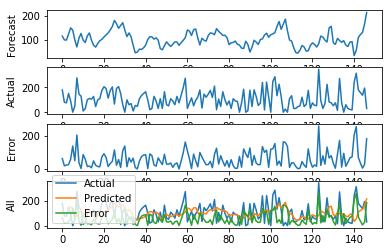

In [9]:
def plot(predicted, test, error):
    plt.subplot(4, 1, 1)
    plt.plot(predicted)
    plt.ylabel('Forecast')

    plt.subplot(4, 1, 2)
    plt.plot(test)
    plt.ylabel('Actual')

    plt.subplot(4, 1, 3)
    plt.plot(error)
    plt.ylabel('Error')

    plt.subplot(4, 1, 4)
    plt.ylabel('All')
    plt.plot(X_test, label='Actual')
    plt.plot(predicted, label='Predicted')
    plt.plot(error, label='Error')
    plt.legend()

plot(predicted, X_test, error)

In [10]:
# Calculate errors
mse = mean_squared_error(X_test, predicted)
print("MSE = {:.4f}".format(mse))

mape = mean_absolute_error(X_test, predicted)
print("MAPE = {:.4f}".format(mape))

MSE = 6329.0670
MAPE = 59.9900


## Holt-Winter Method

Forecasting using Holtzman Winter Method, also known as Triple Exponential Smoothing. 

In [19]:
alpha, beta, gamma = 0.1, 0.1, 0.1
L = 4

In [20]:
def initial_trend(X_train, L):
    total = 0
    for i in range(L):
        t = (X_train[i+L] - X_train[i])
        t /= L
        total += t
    return total / L

def initial_season_components(X_train, L):
    
    no_of_seasons = int(len(X_train)/L)
    season_averages = []
    seasonal_data = {}
    
    # Find season averages
    for season in range(no_of_seasons):
        i = L*season
        season_data = X_train[i:i+L]
        season_avg = sum(season_data)/L
        season_averages.append(season_avg)
        
    # Find initial values for each season
    for i in range(L):
        total_over_avg = 0
        for season in range(no_of_seasons):
            ind = L*season
            total_over_avg += X_train[ind+i] - season_averages[season]
        seasonal_data[i] = total_over_avg/no_of_seasons
    return seasonal_data

In [22]:
X_train = list(X_train)
no_to_predict = len(X_train)

def triple_exponential_smoothing(X_train, X_test, L, alpha, beta, gamma, no_to_predict):
        preds = []
        seasonal_data = initial_season_components(X_train, L)
            
        smooth = X_train[0]
        trend = initial_trend(X_train, L)
        result = [X_train[0]]
        
        for i in range(L + no_to_predict):
            if i >= len(X_train):
                m = i - len(X_train) + 1
                val = smooth + m * trend + seasonal_data[i % L]
                result.append(val)
            else:
                val = X_train[i]
                last_smooth, smooth = smooth, alpha * (val - seasonal_data [i%L]) + (1-alpha) * (smooth + trend)
                trend = beta * (smooth - last_smooth) + (1-beta) * trend
                seasonal_data[i % L] = gamma * (val-smooth) + (1-gamma) * seasonal_data[i%L]
                tot = smooth + trend + seasonal_data[i%L]
                result.append(tot)
        return result
    
result = triple_exponential_smoothing(X_train, X_test, L, alpha, beta, gamma, no_to_predict)

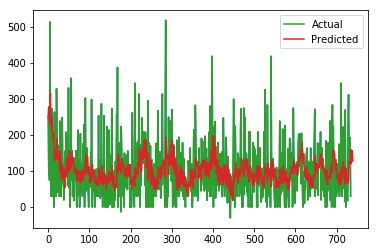

In [23]:
import matplotlib.pyplot as plt
plt.plot(X_train)
plt.plot(result)
plt.plot(X_train, label='Actual')
plt.plot(result, label='Predicted')
plt.legend()